# Concentration

*9 Jul 2022*

Calculations about the concentration of NFW.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

import matplotlib
matplotlib.rcParams.update({'font.size': 16})

from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
cosmo = FlatLambdaCDM(H0=67.5, Om0=0.316)
lens_cosmo = LensCosmo(z_lens=0.5, z_source=1.0, cosmo=cosmo)

In [2]:
zl = 0.5
rho_crit = cosmo.critical_density(zl).to(u.Msun/u.Mpc**3)
rho_crit

<Quantity 2.21355321e+11 solMass / Mpc3>

In [3]:
def concentration_mass_ratio(c, tau):
    # M200 / Mtot
    numerator = (tau**2 - 1) * np.log((1+c)**2/(1+c**2/tau**2)) + 2*(tau**2+1)*(-c/(c+1)) + 4*tau*np.arctan(c/tau)
    denominator = (tau**2 - 1) * np.log(tau**2) - 2 * (tau**2 + 1) + 2 * np.pi * tau
    return numerator/denominator

def rs(mtot, c, tau):
    return 1/c * (3 * mtot / (4*200*np.pi * rho_crit) * concentration_mass_ratio(c, tau))**(1/3.)

In [4]:
def get_conc_params(c):
    my_rs = rs(1e6 * u.Msun, c, 20).to(u.Mpc).value
    my_m200_ratio = concentration_mass_ratio(c, 20)
    return(my_rs, my_m200_ratio)

In [5]:
for c in [15, 20, 25, 30, 45, 60]:
    print(c, get_conc_params(c))

15 (0.00010753236342692636, 0.7782155825243172)
20 (8.295880885181364e-05, 0.8470052106097359)
25 (6.746192705693631e-05, 0.8896205902164536)
30 (5.679591087998018e-05, 0.9173256626468627)
45 (3.842789440418938e-05, 0.9589277335020678)
60 (2.8989227655810114e-05, 0.9758257131088525)


---

Get spread compared to LCDM

In [6]:
mu = 1.022
sig = 0.128
for c in [15, 20, 25, 30, 35, 45, 60]:
    nsig = (np.log10(c) - mu) / sig
    print(f'conc {c} nsig {nsig}')

conc 15 nsig 1.2038379613725103
conc 20 nsig 2.1799218411248535
conc 25 nsig 2.9370313177502942
conc 30 nsig 3.5556348024973623
conc 35 nsig 4.078656596486528
conc 45 nsig 4.931347763869873
conc 60 nsig 5.907431643622216


In [7]:
mu = 1.050
sig = 0.124
for c in [15, 20, 25, 30, 35, 45, 60]:
    nsig = (np.log10(c) - mu) / sig
    print(f'conc {c} nsig {nsig}')

conc 15 nsig 1.0168649923845265
conc 20 nsig 2.0244354489030743
conc 25 nsig 2.8059678118712714
conc 30 nsig 3.4445262477392125
conc 35 nsig 3.984419712502223
conc 45 nsig 4.864617046575352
conc 60 nsig 5.8721875030939


---

In [4]:
concentration_mass_ratio(60, 20)

0.9758257131088525

In [5]:
concentration_mass_ratio(16, 20)

0.7949072694929439

In [6]:
concentration_mass_ratio(15, 20)

0.7782155825243172

In [7]:
rs(1e6 * u.Msun, 60, 20)

<Quantity 2.89892277e-05 Mpc>

In [8]:
rs(1e6 * u.Msun, 16, 20)

<Quantity 0.00010153 Mpc>

In [14]:
rs(1e6 * u.Msun, 15, 20)

<Quantity 0.00010753 Mpc>

In [8]:
c_list = np.linspace(10,60, 50)
rs_list = rs(1e6 * u.Msun, c_list, 20).to(u.kpc)

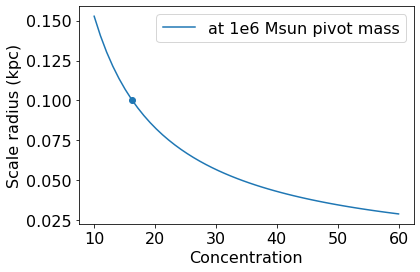

In [9]:
plt.plot(c_list, rs_list, label='at 1e6 Msun pivot mass')
plt.xlabel('Concentration')
plt.ylabel('Scale radius (kpc)')
plt.scatter([16.27], rs(1e6*u.Msun, 16.27, 20).to(u.kpc))
plt.legend()

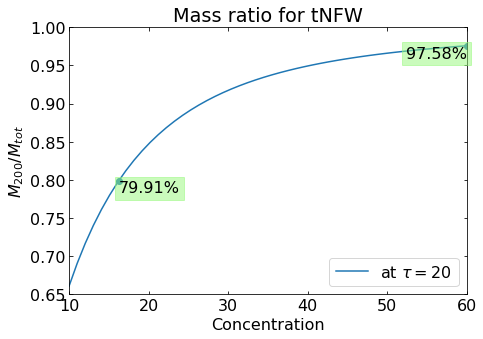

In [10]:
tau = 20
c_list = np.linspace(10,60, 50)
mass_ratio_list = concentration_mass_ratio(c_list, tau)
plt.figure(figsize=(7,5))
plt.plot(c_list, mass_ratio_list, label=r'at $\tau=20$')
plt.xlabel('Concentration')
plt.ylabel(r'$M_{200} / M_{tot}$')
plt.xlim(10, 60)
plt.ylim(.65, 1.0)
plt.yticks(np.arange(.65, 1.01, .05))
plt.tick_params(top=True, right=True, direction='in')
plt.legend(loc='lower right')
plt.title('Mass ratio for tNFW')
c_scatter = np.array([16.27, 60])
mass_ratio_scatter = concentration_mass_ratio(c_scatter, tau)
plt.scatter(c_scatter, mass_ratio_scatter)
for i in range(len(c_scatter)):
    t = plt.text(c_scatter[i], mass_ratio_scatter[i],
             '{:.2f}%'.format(mass_ratio_scatter[i] * 100),
             verticalalignment='top',
             horizontalalignment=['left', 'right'][i])
    t.set_bbox(dict(facecolor='xkcd:light green', alpha=0.5, edgecolor='xkcd:light green'))
    
plt.tight_layout()

In [11]:
rs(1e6 * u.Msun, 60, 20)

<Quantity 2.89892277e-05 Mpc>

In [12]:
rs(1e6 * u.Msun, 30, 20)

<Quantity 5.67959109e-05 Mpc>

---

Let's look at some generated data now.

In [37]:
indir_new = '/n/holyscratch01/dvorkin_lab/Users/atsang/mif/in_narrowcat_subc_m6m10_noise10_c60'
indir_old = '/n/holyscratch01/dvorkin_lab/Users/atsang/mif/in_narrowcat_subc_m6m10_noise10'
coord_dir_new = '/n/holyscratch01/dvorkin_lab/Users/atsang/mif/coord_narrowcat_subc_m6m10_noise10_c60'
kpertad_dir_new = '/n/holyscratch01/dvorkin_lab/Users/atsang/mif/kpertaligndiff_narrowcat_subc_m6m10_noise10_c60'
kpertad_dir_old = '/n/holyscratch01/dvorkin_lab/Users/atsang/mif/kpertaligndiff_narrowcat_subc_m6m10_noise10'

In [46]:
#for seed in [180001, 180005, 180008]:
seed = 180008

in_new = np.load(os.path.join(indir_new, f'{seed}.npy'))
in_old = np.load(os.path.join(indir_old, f'{seed}.npy'))
coord_new = np.load(os.path.join(coord_dir_new, f'{seed}.npy'))
kpertad_new = np.load(os.path.join(kpertad_dir_new, f'{seed}.npy'))
kpertad_old = np.load(os.path.join(kpertad_dir_old, f'{seed}.npy'))
print('seed {} mass bin {}'.format(seed, np.max(coord_new)))

seed 180008 mass bin 7


Text(0.5, 1.0, 'Mass bin 7')

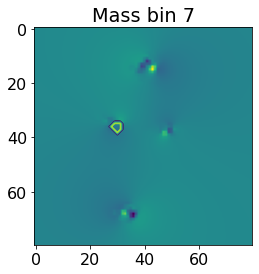

In [47]:
plt.imshow(kpertad_new)
plt.contour(coord_new)
plt.title('Mass bin {}'.format(np.max(coord_new)))

Text(0.5, 1.0, 'Mass bin 7')

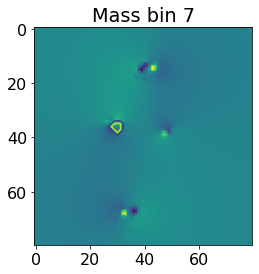

In [48]:
plt.imshow(kpertad_old)
plt.contour(coord_new)
plt.title('Mass bin {}'.format(np.max(coord_new)))

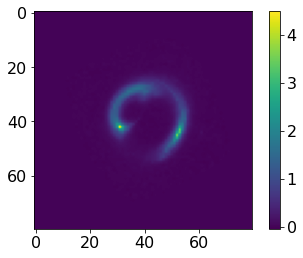

In [15]:
plt.imshow(in_new)
plt.colorbar()

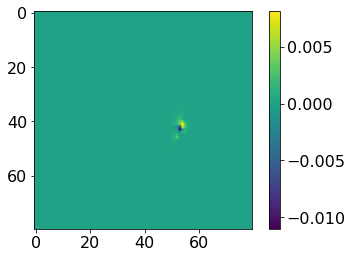

In [16]:
plt.imshow(in_new - in_old)
plt.colorbar()

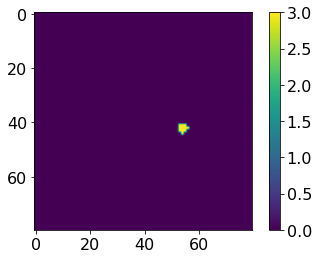

In [17]:
plt.imshow(coord_new)
plt.colorbar()